In [26]:
import pandas as pd
import numpy as np

## **0) 데이터 로드 및 확인**

In [3]:
train=pd.read_csv("C:/Users/MYCOM/Downloads/preproc_train.csv")

In [4]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,weekday,weekend,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1


In [5]:
train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type                 0
cluster              0
dcoilwtico           0
transactions    245784
weekday              0
weekend              0
holiday              0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  weekday       object 
 13  weekend       int64  
 14  holiday       int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 343.4+ MB


## **1) onpromotion 전처리**

{'whiskers': [<matplotlib.lines.Line2D at 0x1c887f4ca90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c887f62070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c887f4c7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c887f62610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c887f628e0>],
 'means': []}

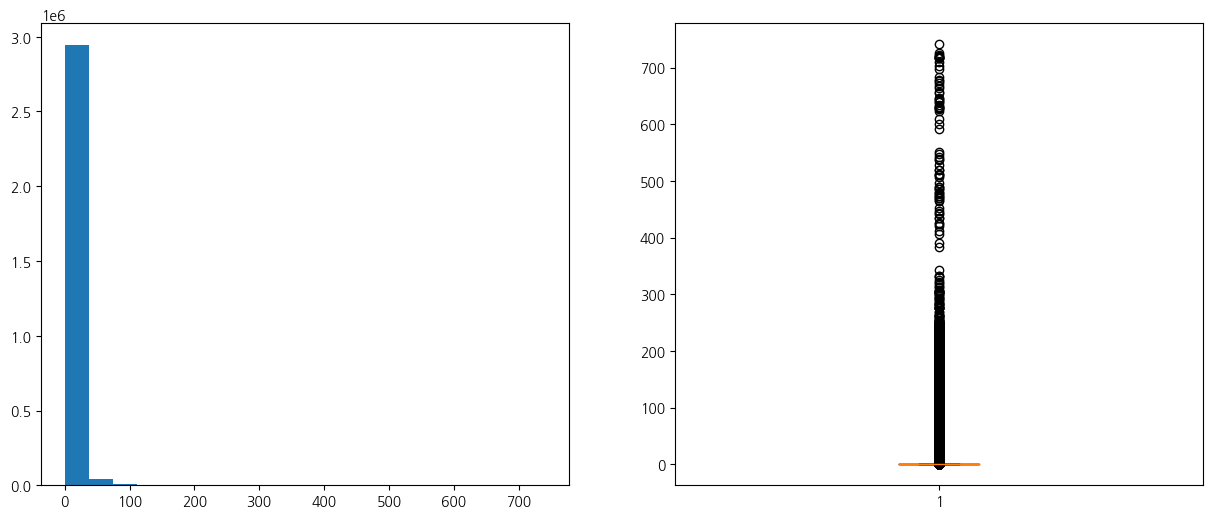

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train['onpromotion'],bins=20)
ax2.boxplot(train['onpromotion'])

In [8]:
train['onpromotion'].describe()
# onpromotion이 0인 데이터가 너무 많음..문제

count    3.000888e+06
mean     2.602770e+00
std      1.221888e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.410000e+02
Name: onpromotion, dtype: float64

In [9]:
train['onpromotion'].skew()

11.166561930715057

onpromotion 데이터의 이상치가 매우 많다는 걸 알 수 있음 + 왜도가 굉장히 큼

{'whiskers': [<matplotlib.lines.Line2D at 0x1c8884d3e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8884e2400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8884d3b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8884e29a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c8884e2c70>],
 'means': []}

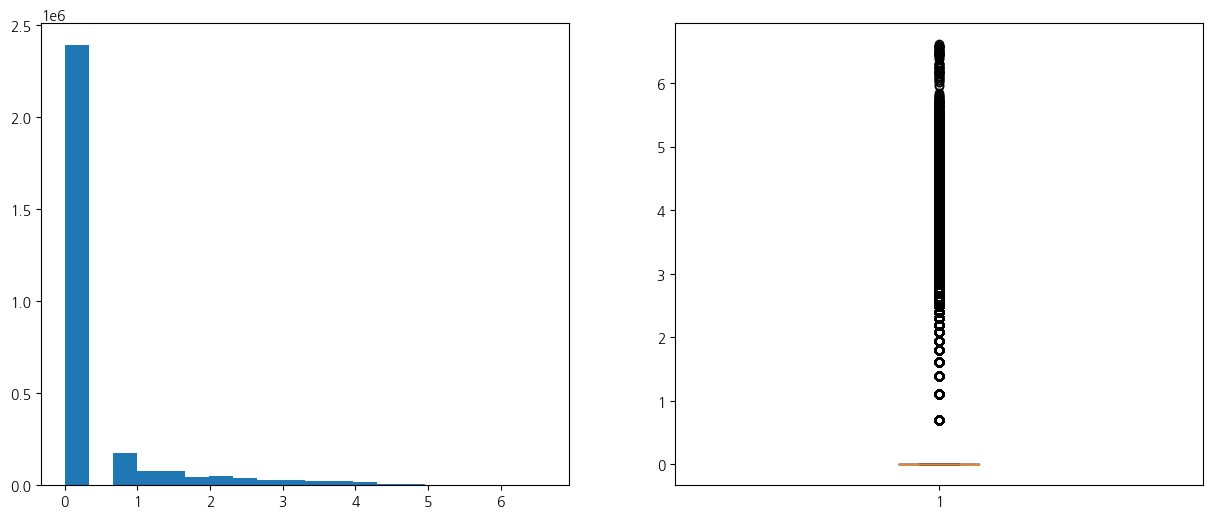

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(np.log1p(train['onpromotion']),bins=20)
ax2.boxplot(np.log1p(train['onpromotion']))

In [11]:
np.log1p(train['onpromotion']).skew()

2.7228408591771913

In [12]:
np.log1p(train['onpromotion']).describe()

count    3.000888e+06
mean     3.761500e-01
std      9.026737e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.609349e+00
Name: onpromotion, dtype: float64

로그 변환을 해도 왜도값은 줄지만 histplot과 boxplot을 확인한 결과 이상치가 여전히 많다는 것을 확인할 수 있음

*따라서 로그변환 말고 다른 전처리가 필요*

In [13]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
pd.DataFrame(train['onpromotion'].value_counts().sort_index())

,onpromotion
0,2389559
1,174551
2,79386
3,45862
4,31659
5,24540
6,22079
7,18917
8,15587
9,13850


In [14]:
# 일단 로그 변환한거 새로운 변수로 추가
train['onpromotion_exp']=np.log1p(train['onpromotion'])
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,weekday,weekend,holiday,onpromotion_exp
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0


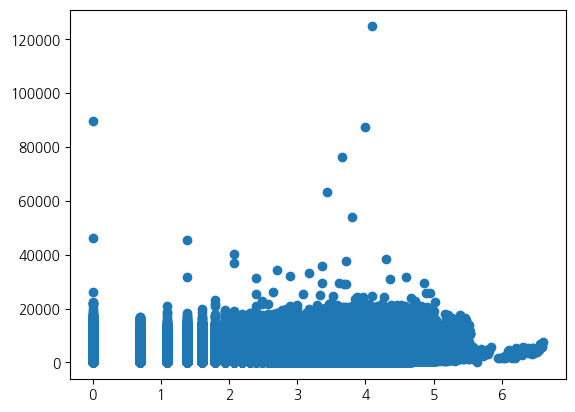

In [15]:
plt.scatter(train['onpromotion_exp'],train['sales'])

In [16]:
train.corr()['onpromotion_exp']

id                 0.371328
store_nbr          0.007947
sales              0.475843
onpromotion        0.751968
cluster            0.004470
dcoilwtico        -0.285497
transactions       0.034138
weekend           -0.019276
holiday            0.023604
onpromotion_exp    1.000000
Name: onpromotion_exp, dtype: float64

In [17]:
train.corr()['onpromotion']

id                 0.206260
store_nbr          0.007286
sales              0.427923
onpromotion        1.000000
cluster            0.005667
dcoilwtico        -0.154435
transactions       0.025511
weekend           -0.028304
holiday            0.017338
onpromotion_exp    0.751968
Name: onpromotion, dtype: float64

onpromotion을 log1p변환한게 onpromotio보다 sales와의 상관관계가 높아짐을 확인

In [18]:
# 사실 describe매서드에서 나온 25% 50% 75%에 따라 .. 값 할당해서 새로운 변수 만드는 방법도 여러 가지 생각해봤지만
# 애초에 정규분포 형태가 아니기도 하고.. 기준도 딱히 명확하지 않고 너무 주관적인 의견이 많이 들어가서.. 변수의 의미가 없을 것 같아 지웠음
'''
train['onpromotion_p']=0
train.loc[train['onpromotion']==1,'onpromotion_p']=1
train.loc[train['onpromotion']==2,'onpromotion_p']=2
train.loc[train['onpromotion']==3,'onpromotion_p']=3
train.loc[(train['onpromotion']>3) & (train['onpromotion']<=5),'onpromotion_p']=4
train.loc[(train['onpromotion']>5) & (train['onpromotion']<=10),'onpromotion_p']=5
train.loc[(train['onpromotion']>10) & (train['onpromotion']<=25),'onpromotion_p']=6
train.loc[(train['onpromotion']>25) & (train['onpromotion']<=741),'onpromotion_p']=7
'''

"\ntrain['onpromotion_p']=0\ntrain.loc[train['onpromotion']==1,'onpromotion_p']=1\ntrain.loc[train['onpromotion']==2,'onpromotion_p']=2\ntrain.loc[train['onpromotion']==3,'onpromotion_p']=3\ntrain.loc[(train['onpromotion']>3) & (train['onpromotion']<=5),'onpromotion_p']=4\ntrain.loc[(train['onpromotion']>5) & (train['onpromotion']<=10),'onpromotion_p']=5\ntrain.loc[(train['onpromotion']>10) & (train['onpromotion']<=25),'onpromotion_p']=6\ntrain.loc[(train['onpromotion']>25) & (train['onpromotion']<=741),'onpromotion_p']=7\n"

In [19]:
train['onpromotion_yn']=0
train.loc[train['onpromotion']!=0,'onpromotion_yn']=1
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,weekday,weekend,holiday,onpromotion_exp,onpromotion_yn
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,NaN,Tuesday,0,1,0.0,0


In [20]:
train.corr()['onpromotion_yn']

id                 0.398265
store_nbr          0.010134
sales              0.357970
onpromotion        0.421139
cluster            0.004251
dcoilwtico        -0.324242
transactions       0.046310
weekend           -0.007676
holiday            0.025696
onpromotion_exp    0.823857
onpromotion_yn     1.000000
Name: onpromotion_yn, dtype: float64

onpromotion을 했는지 안했는지.. 로 onpromotion_yn(했으면 1, 아니면 0으로) 변수를 만들었으나 오히려 sales와의 상관관계가 떨어짐.. 그냥 안할게요 그냥

In [21]:
train.drop('onpromotion_yn',axis=1,inplace=True)

## **2) family + city 시각화**

In [22]:
train['family'].nunique()

33

In [24]:
# family별 sales의 sum값 계산히기
train.groupby('family')['sales'].sum().sort_values(ascending=False)

family
GROCERY I                    343462734.88600
BEVERAGES                    216954486.00000
PRODUCE                      122704684.67646
CLEANING                      97521289.00000
DAIRY                         64487709.00000
BREAD/BAKERY                  42133945.57637
POULTRY                       31876004.47172
MEATS                         31086468.40407
PERSONAL CARE                 24592051.00000
DELI                          24110322.46877
HOME CARE                     16022744.00000
EGGS                          15588296.00000
FROZEN FOODS                  14073887.71991
PREPARED FOODS                 8799895.11694
LIQUOR,WINE,BEER               7746640.00000
SEAFOOD                        2015431.88282
GROCERY II                     1962767.00000
HOME AND KITCHEN I             1861491.00000
HOME AND KITCHEN II            1520670.00000
CELEBRATION                     761177.00000
LINGERIE                        653114.00000
LADIESWEAR                      651159.00000
PLA

In [25]:
# family별 sales의 mean값 계산히기
train.groupby('family')['sales'].mean().sort_values(ascending=False)

family
GROCERY I                    3776.97210
BEVERAGES                    2385.79315
PRODUCE                      1349.35212
CLEANING                     1072.41674
DAIRY                         709.15489
BREAD/BAKERY                  463.33625
POULTRY                       350.53229
MEATS                         341.84996
PERSONAL CARE                 270.43251
DELI                          265.13507
HOME CARE                     176.19803
EGGS                          171.42052
FROZEN FOODS                  154.76695
PREPARED FOODS                 96.77020
LIQUOR,WINE,BEER               85.18782
SEAFOOD                        22.16319
GROCERY II                     21.58405
HOME AND KITCHEN I             20.47034
HOME AND KITCHEN II            16.72242
CELEBRATION                     8.37047
LINGERIE                        7.18213
LADIESWEAR                      7.16063
PLAYERS AND ELECTRONICS         6.18686
AUTOMOTIVE                      6.10124
LAWN AND GARDEN                 6

(array([20.,  3.,  4.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([7.07970441e-02, 1.25967507e+02, 2.51864217e+02, 3.77760927e+02,
        5.03657637e+02, 6.29554348e+02, 7.55451058e+02, 8.81347768e+02,
        1.00724448e+03, 1.13314119e+03, 1.25903790e+03, 1.38493461e+03,
        1.51083132e+03, 1.63672803e+03, 1.76262474e+03, 1.88852145e+03,
        2.01441816e+03, 2.14031487e+03, 2.26621158e+03, 2.39210829e+03,
        2.51800500e+03, 2.64390171e+03, 2.76979842e+03, 2.89569513e+03,
        3.02159184e+03, 3.14748855e+03, 3.27338526e+03, 3.39928197e+03,
        3.52517868e+03, 3.65107539e+03, 3.77697210e+03]),
 <BarContainer object of 30 artists>)

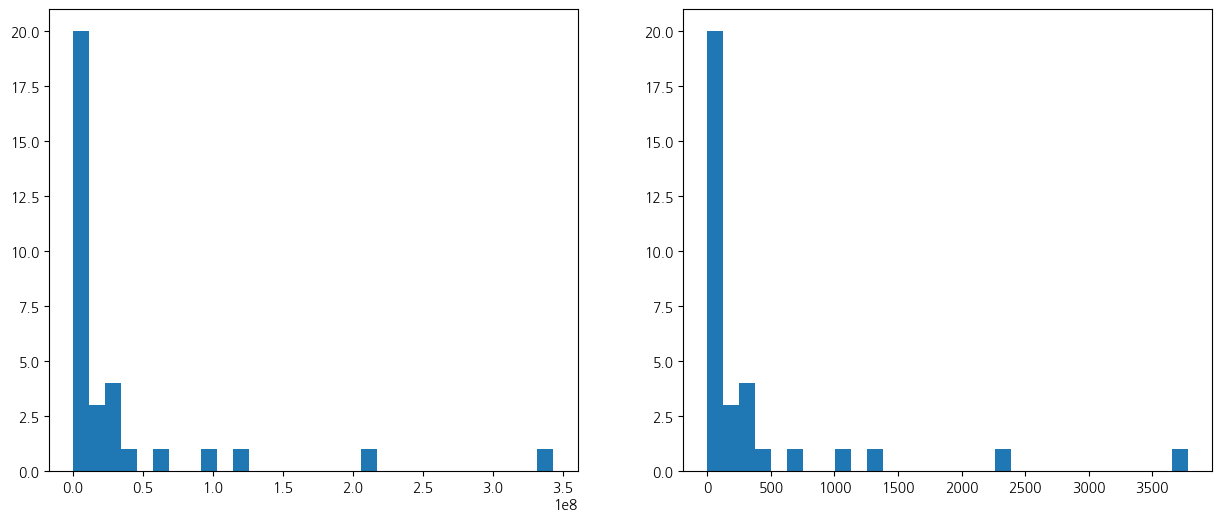

In [29]:
# family별 sales의 mean값,sum값 histplot으로 확인하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train.groupby('family')['sales'].sum(),bins=30)
ax2.hist(train.groupby('family')['sales'].mean(),bins=30)

In [30]:
# city별 sales의 sum값 계산히기
pd.options.display.float_format = '{:.5f}'.format
train.groupby('family')['sales'].sum().sort_values(ascending=False)

family
GROCERY I                    343462734.88600
BEVERAGES                    216954486.00000
PRODUCE                      122704684.67646
CLEANING                      97521289.00000
DAIRY                         64487709.00000
BREAD/BAKERY                  42133945.57637
POULTRY                       31876004.47172
MEATS                         31086468.40407
PERSONAL CARE                 24592051.00000
DELI                          24110322.46877
HOME CARE                     16022744.00000
EGGS                          15588296.00000
FROZEN FOODS                  14073887.71991
PREPARED FOODS                 8799895.11694
LIQUOR,WINE,BEER               7746640.00000
SEAFOOD                        2015431.88282
GROCERY II                     1962767.00000
HOME AND KITCHEN I             1861491.00000
HOME AND KITCHEN II            1520670.00000
CELEBRATION                     761177.00000
LINGERIE                        653114.00000
LADIESWEAR                      651159.00000
PLA

In [31]:
# city별 sales의 mean값 계산히기
pd.options.display.float_format = '{:.5f}'.format
train.groupby('family')['sales'].mean().sort_values(ascending=False)

family
GROCERY I                    3776.97210
BEVERAGES                    2385.79315
PRODUCE                      1349.35212
CLEANING                     1072.41674
DAIRY                         709.15489
BREAD/BAKERY                  463.33625
POULTRY                       350.53229
MEATS                         341.84996
PERSONAL CARE                 270.43251
DELI                          265.13507
HOME CARE                     176.19803
EGGS                          171.42052
FROZEN FOODS                  154.76695
PREPARED FOODS                 96.77020
LIQUOR,WINE,BEER               85.18782
SEAFOOD                        22.16319
GROCERY II                     21.58405
HOME AND KITCHEN I             20.47034
HOME AND KITCHEN II            16.72242
CELEBRATION                     8.37047
LINGERIE                        7.18213
LADIESWEAR                      7.16063
PLAYERS AND ELECTRONICS         6.18686
AUTOMOTIVE                      6.10124
LAWN AND GARDEN                 6

(array([1., 0., 0., 1., 1., 0., 0., 2., 4., 0., 1., 1., 2., 2., 1., 1., 2.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([ 73.60184519,  89.70102002, 105.80019484, 121.89936967,
        137.9985445 , 154.09771933, 170.19689415, 186.29606898,
        202.39524381, 218.49441863, 234.59359346, 250.69276829,
        266.79194312, 282.89111794, 298.99029277, 315.0894676 ,
        331.18864243, 347.28781725, 363.38699208, 379.48616691,
        395.58534174, 411.68451656, 427.78369139, 443.88286622,
        459.98204105, 476.08121587, 492.1803907 , 508.27956553,
        524.37874035, 540.47791518, 556.57709001]),
 <BarContainer object of 30 artists>)

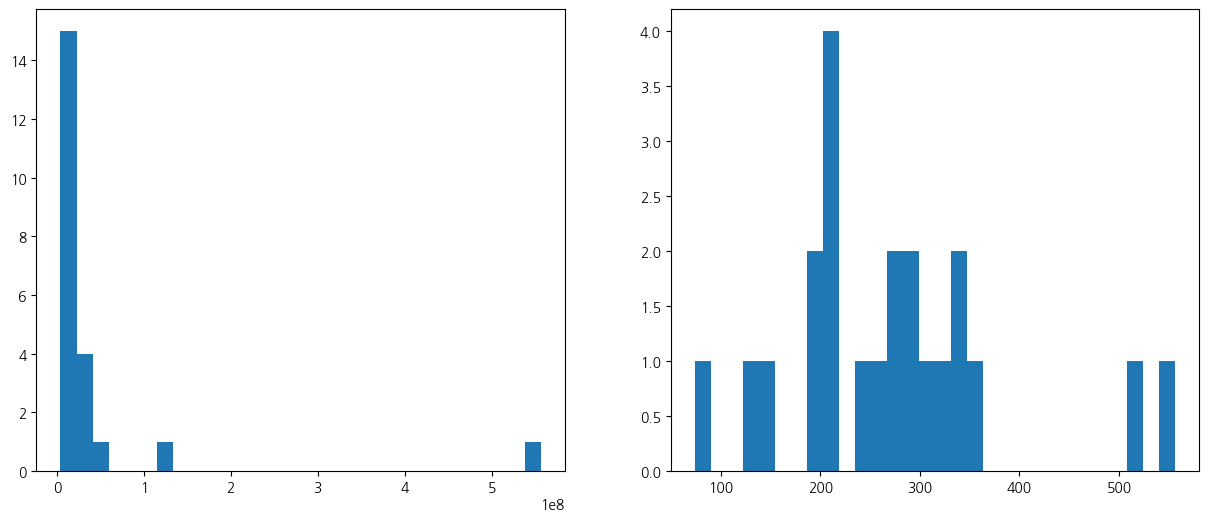

In [32]:
# city별 sales의 mean값,sum값 histplot으로 확인하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train.groupby('city')['sales'].sum(),bins=30)
ax2.hist(train.groupby('city')['sales'].mean(),bins=30)

## **3) dcoilwitco 전처리**

{'whiskers': [<matplotlib.lines.Line2D at 0x1c96aad5ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c96aae44c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c96aad5c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c96aae4a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c96aae4d30>],
 'means': []}

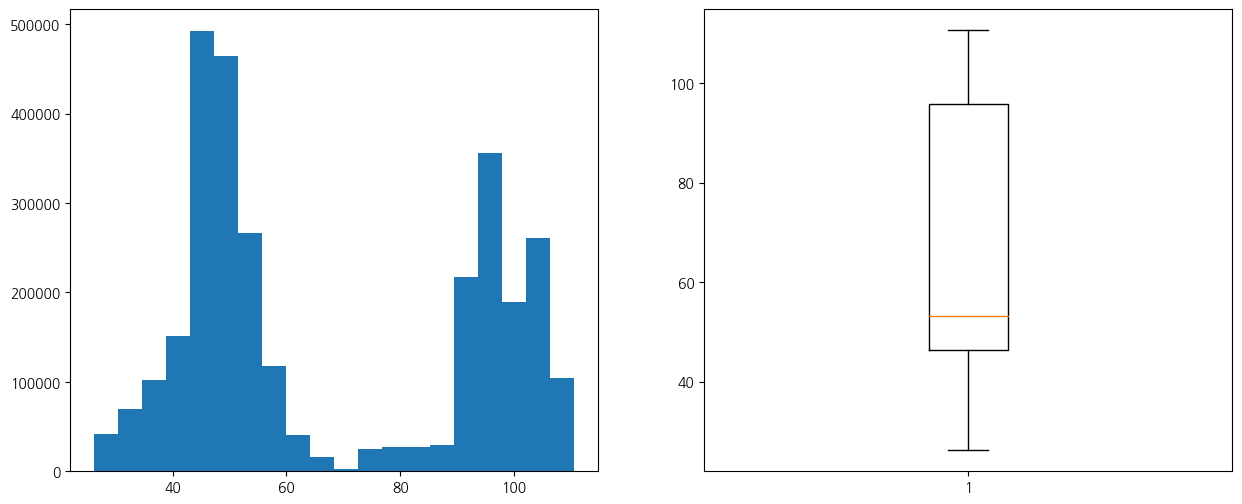

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(train['dcoilwtico'],bins=20)
ax2.boxplot(train['dcoilwtico'])

In [37]:
train['dcoilwtico'].skew()

0.3063384086211184

왜도값도 낮고 이상치도 없어서 모델 돌리기 전에 정규화만 하면 될 듯!

크게 전처리할 부분 없어보임!

In [38]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,weekday,weekend,holiday,onpromotion_exp
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,93.14000,NaN,Tuesday,0,1,0.00000
1,1,2013-01-01,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,93.14000,NaN,Tuesday,0,1,0.00000
2,2,2013-01-01,1,BEAUTY,0.00000,0,Quito,Pichincha,D,13,93.14000,NaN,Tuesday,0,1,0.00000
3,3,2013-01-01,1,BEVERAGES,0.00000,0,Quito,Pichincha,D,13,93.14000,NaN,Tuesday,0,1,0.00000
4,4,2013-01-01,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,93.14000,NaN,Tuesday,0,1,0.00000


## **4) type 변수 확인**

In [45]:
train['type'].value_counts()

D    1000296
C     833580
A     500148
B     444576
E     222288
Name: type, dtype: int64

In [50]:
train.groupby('type')['sales'].mean().sort_values(ascending=False)
# type도 그냥 더미화하면 될 듯

type
A   705.87874
D   350.97941
B   326.73971
E   269.12130
C   197.26330
Name: sales, dtype: float64

In [51]:
train.groupby('cluster')['sales'].mean().sort_values(ascending=False)

cluster
5    1117.24525
14    708.22772
8     647.37786
11    603.50702
17    592.23151
6     342.66173
1     326.16397
12    324.46141
13    324.36411
4     296.57287
9     274.96834
2     260.17062
10    255.89755
16    238.59814
15    199.01011
3     194.41626
7     139.26186
Name: sales, dtype: float64

In [52]:
train['cluster'].value_counts()

3     389004
10    333432
6     333432
15    277860
13    222288
14    222288
11    166716
4     166716
8     166716
1     166716
9     111144
2     111144
7     111144
16     55572
5      55572
12     55572
17     55572
Name: cluster, dtype: int64

In [39]:
# city 더미화 시키기
train=pd.get_dummies(train, columns = ['city'])

In [41]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,state,type,cluster,dcoilwtico,...,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,Pichincha,D,13,93.14000,...,0,0,0,0,0,0,1,0,0,0
1,1,2013-01-01,1,BABY CARE,0.00000,0,Pichincha,D,13,93.14000,...,0,0,0,0,0,0,1,0,0,0
2,2,2013-01-01,1,BEAUTY,0.00000,0,Pichincha,D,13,93.14000,...,0,0,0,0,0,0,1,0,0,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0,Pichincha,D,13,93.14000,...,0,0,0,0,0,0,1,0,0,0
4,4,2013-01-01,1,BOOKS,0.00000,0,Pichincha,D,13,93.14000,...,0,0,0,0,0,0,1,0,0,0


In [56]:
# city를 더미화 시켰으니 state 변수는 빼도 될 듯함
train.drop('state',axis=1,inplace=True)

In [57]:
# type 더미화 시키기
train=pd.get_dummies(train, columns = ['type'])

In [58]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,cluster,dcoilwtico,transactions,weekday,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,type_A,type_B,type_C,type_D,type_E
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,13,93.14000,NaN,Tuesday,...,0,1,0,0,0,0,0,0,1,0
1,1,2013-01-01,1,BABY CARE,0.00000,0,13,93.14000,NaN,Tuesday,...,0,1,0,0,0,0,0,0,1,0
2,2,2013-01-01,1,BEAUTY,0.00000,0,13,93.14000,NaN,Tuesday,...,0,1,0,0,0,0,0,0,1,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0,13,93.14000,NaN,Tuesday,...,0,1,0,0,0,0,0,0,1,0
4,4,2013-01-01,1,BOOKS,0.00000,0,13,93.14000,NaN,Tuesday,...,0,1,0,0,0,0,0,0,1,0


In [60]:
# family 더미화 시키기
# train=pd.get_dummies(train, columns = ['family'])

train 데이터 row 개수도 많고 family도 33개 값이라 이 코드 셀 실행하는데 시간이 오래 걸림..


다른 분들 전처리 참고해서 위에 부분 더 수정하고 마지막에 더미화 시키겠음

아니면 label encoding 하는 것도 괜찮을 듯
// 만약 원핫인코딩 한다면 col 개수가 50+33개 해서 83개가 될테니..너무 많을 수도

만약에 label encoding을 하려면 family마다 sales 평균값에 차이가 많이 나기 때문에

그 순서를 고래하여 더미화 시키기

In [69]:
# 각 family별 sales의 평균 계산
family_sales_mean = train.groupby('family')['sales'].mean().sort_values(ascending=True)
# 평균값을 기준으로 라벨 부여
# 이때 label값이 0이면 안되므로.. 1 추가해서 label값을 할당하기
label_mapping = {family: label+1 for label, family in enumerate(family_sales_mean.index)}
train['family_label'] = train['family'].map(label_mapping)

In [75]:
train.groupby('family')['family_label'].mean().sort_values(ascending=False)

family
GROCERY I                    33.00000
BEVERAGES                    32.00000
PRODUCE                      31.00000
CLEANING                     30.00000
DAIRY                        29.00000
BREAD/BAKERY                 28.00000
POULTRY                      27.00000
MEATS                        26.00000
PERSONAL CARE                25.00000
DELI                         24.00000
HOME CARE                    23.00000
EGGS                         22.00000
FROZEN FOODS                 21.00000
PREPARED FOODS               20.00000
LIQUOR,WINE,BEER             19.00000
SEAFOOD                      18.00000
GROCERY II                   17.00000
HOME AND KITCHEN I           16.00000
HOME AND KITCHEN II          15.00000
CELEBRATION                  14.00000
LINGERIE                     13.00000
LADIESWEAR                   12.00000
PLAYERS AND ELECTRONICS      11.00000
AUTOMOTIVE                   10.00000
LAWN AND GARDEN               9.00000
PET SUPPLIES                  8.00000
BEAUT

In [77]:
train.corr()['family_label']
# sales와 0.45 정도의 상관관계를 가지는 것으로 파악됨

id                    0.00000
store_nbr             0.00000
sales                 0.45005
onpromotion           0.26987
cluster              -0.00000
dcoilwtico           -0.00000
transactions         -0.00000
weekend               0.00000
holiday               0.00000
onpromotion_exp       0.43412
city_Ambato           0.00000
city_Babahoyo        -0.00000
city_Cayambe         -0.00000
city_Cuenca           0.00000
city_Daule           -0.00000
city_El Carmen        0.00000
city_Esmeraldas       0.00000
city_Guaranda        -0.00000
city_Guayaquil       -0.00000
city_Ibarra          -0.00000
city_Latacunga       -0.00000
city_Libertad        -0.00000
city_Loja             0.00000
city_Machala          0.00000
city_Manta            0.00000
city_Playas          -0.00000
city_Puyo            -0.00000
city_Quevedo         -0.00000
city_Quito            0.00000
city_Riobamba        -0.00000
city_Salinas         -0.00000
city_Santo Domingo   -0.00000
type_A                0.00000
type_B    